Linear Regression and SVM 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/UP_DataNew_2019onwards.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

#df.tail()

First Five Rows  

         Date  Block      Time     Demand
0  01-01-2019      1  00:15:00  11558.634
1  01-01-2019      2  00:30:00  11353.716
2  01-01-2019      3  00:45:00  11208.736
3  01-01-2019      4  01:00:00  11114.265
4  01-01-2019      5  01:15:00  10984.300 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66656 entries, 0 to 66655
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    66656 non-null  object 
 1   Block   66656 non-null  int64  
 2   Time    66656 non-null  object 
 3   Demand  66656 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB
None 

Describe the Dataset  

              Block        Demand
count  66656.000000  66656.000000
mean      48.484638  14647.419964
std       27.714470   3525.246171
min        1.000000   4363.450000
25%       24.000000  11842.759000
50%       48.000000  14191.887500
75%       72.000000  17337.927500
max 

In [ ]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Date"]).dt.month
dataset["Year"] = pd.to_datetime(df["Date"]).dt.year
dataset["Date1"] = pd.to_datetime(df["Date"]).dt.date
dataset["Time1"] = pd.to_datetime(df["Time"]).dt.time
dataset["Minute"] = pd.to_datetime(df["Time"]).dt.minute
dataset["Hour"] = pd.to_datetime(df["Time"]).dt.hour
dataset = df.set_index("Time")
#dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,Date,Block,Demand,Month,Year,Date1,Time1,Minute,Hour
Time,,,,,,,,,
00:15:00,01-01-2019,1,11558.634,1,2019,2019-01-01,00:15:00,15,0
00:30:00,01-01-2019,2,11353.716,1,2019,2019-01-01,00:30:00,30,0
00:45:00,01-01-2019,3,11208.736,1,2019,2019-01-01,00:45:00,45,0
01:00:00,01-01-2019,4,11114.265,1,2019,2019-01-01,01:00:00,0,1
01:15:00,01-01-2019,5,10984.300,1,2019,2019-01-01,01:15:00,15,1


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Demand According to Year')

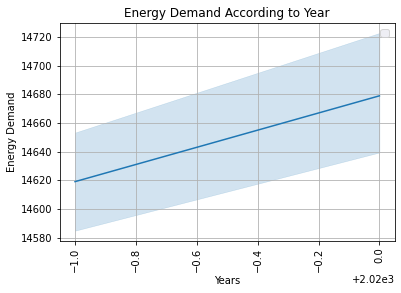

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Demand"], data=df)
sns.set(rc={'figure.figsize':(6,6)})

plt.title("Energy consumption in Year 2019")
plt.xlabel("Years")
plt.ylabel("Energy Demand")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Demand According to Year")

No handles with labels found to put in legend.


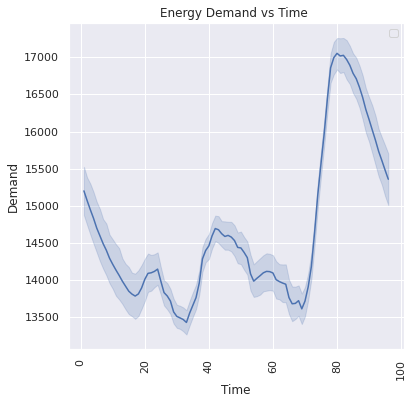

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Block"],y=dataset["Demand"], data=df)
plt.title("Energy Demand vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [ ]:
#wdf = pd.read_csv('/content/5 jul 2020 lko.csv')
#wdf.head()

In [ ]:
#NewDataSet = pd.DataFrame({,'Demand':dataset['Demand']})

In [ ]:
NewDataSet = dataset#[35040:69600]
dfx = NewDataSet.iloc[:,2:3]
dfx

,Demand
Time,
00:15:00,11558.63400
00:30:00,11353.71600
00:45:00,11208.73600
01:00:00,11114.26500
01:15:00,10984.30000
...,...
23:00:00,10582.94190
23:15:00,10416.41479
23:30:00,10267.69379


In [ ]:
#dfx= dfx.drop(['windGust'],1)
#dfx= dfx.drop(['temperature'],1)
#dfx

In [ ]:
fore = 96
dfx['Pred'] = dfx[['Demand']].shift(-fore)
dfx.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Demand,Pred
Time,,
23:00:00,10582.94190,NaN
23:15:00,10416.41479,NaN
23:30:00,10267.69379,NaN
23:45:00,10153.01786,NaN
00:00:00,10035.01971,NaN


In [ ]:
X = np.array(dfx.drop(['Pred'],1))

X = X[:-fore]

X

array([[11558.634],
       [11353.716],
       [11208.736],
       ...,
       [10466.01 ],
       [10286.57 ],
       [10147.6  ]])

In [ ]:
y = np.array(dfx['Pred'])

y = y[:-fore]

y

array([10993.96   , 10871.378  , 10694.375  , ..., 10267.69379,
       10153.01786, 10035.01971])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel='rbf' , C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_confidence = svr_rbf.score(x_test, y_test)
svm_confidence

0.8272162812594638

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_confidence = lr.score(x_test, y_test)
lr_confidence

0.8847515038722501

In [ ]:
x_fore = np.array(dfx.drop(['Pred'],1))[-fore:] 

In [ ]:
lr_pred = lr.predict(x_fore)
lr_pred

array([10148.67643772, 10050.04756444,  9983.40980513,  9932.57837773,
        9842.79196857,  9790.26551181,  9769.10835626,  9742.52659791,
        9697.14603398,  9689.25269544,  9717.53551265,  9766.98045246,
        9839.33292473,  9959.68810398, 10052.29770613, 10137.07805925,
       10240.68576611, 10458.56750857, 10634.25177358, 10810.28005684,
       11072.19178743, 11180.60895691, 11459.67991186, 11770.63593403,
       11681.30418086, 11574.17096384, 11495.92084815, 11376.22647071,
       11126.14950398, 11230.95301509, 11467.22736585, 11603.7112632 ,
       11773.48116902, 12156.43758865, 12278.60223152, 12367.57152917,
       12951.05052921, 13539.53621241, 13681.40155562, 13805.8482552 ,
       13986.28297134, 14077.39893725, 14004.24814237, 13954.13433856,
       13830.39925565, 13683.60137325, 13521.91417585, 13447.62631555,
       13415.75900865, 13254.09368024, 13096.43849148, 12868.26814461,
       12601.40747779, 12325.8914847 , 12146.19343207, 11944.25531856,
      

In [ ]:
svm_pred = svr_rbf.predict(x_fore)
svm_pred

array([ 9942.21283356, 10177.38580311, 10114.27388487, 10248.71839664,
        9940.73230221,  9733.97998891, 10752.69001375,  9728.4538428 ,
       10012.43276463,  9965.83156906,  9942.29658013, 10651.43789559,
        9581.22488256, 10276.6138507 ,  9868.96774422,  9920.02414656,
       10067.72552953, 10338.32029627, 10786.34325261, 10673.88301925,
       10869.70827961, 11556.29897262, 11732.61857434, 11835.82183858,
       11569.11337346, 12059.78945203, 11391.54531407, 11239.63253816,
       10994.01306199, 11053.52360185, 11226.98598195, 11343.24694711,
       11626.94699893, 12440.00048439, 12163.96945192, 12252.10876389,
       12803.91890496, 13761.96121447, 13831.08012376, 13999.85246589,
       14170.1442652 , 14129.87865612, 14311.85346325, 13716.64955127,
       14556.81246858, 13848.33853068, 13420.6992594 , 13956.24001904,
       13569.36821648, 12977.62570474, 12831.37078502, 13075.57134357,
       12257.06157949, 12172.23425058, 12120.63551329, 11858.832476  ,
      

No handles with labels found to put in legend.


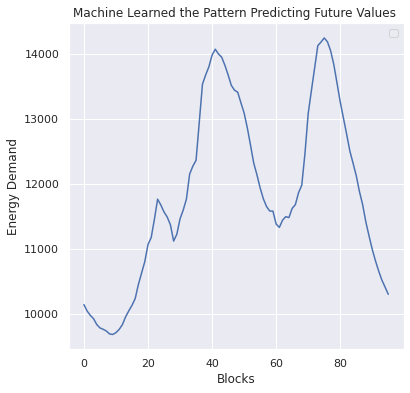

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)
#ax2= fig.add_subplot(212)

x1 = lr_pred
y1 = svm_pred

plt.plot(x1)
#plt.plot(y1)

plt.xlabel('Blocks')
plt.ylabel("Energy Demand")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

In [ ]:
dfx2=pd.read_csv('/content/UP_DataNew.csv')
ds1 = pd.read_csv('/content/UP_DataNew_Prediction_13Sep.csv')

In [ ]:

ds = dfx2[141120:141216]
ds = ds.reset_index()['Demand']
ds1 = ds1.reset_index()['Predicted LR']
ds,ds1

(0     23251.12
 1     23223.71
 2     23081.17
 3     22910.96
 4     22795.85
         ...   
 91    23902.41
 92    23817.15
 93    23762.92
 94    23712.38
 95    23555.42
 Name: Demand, Length: 96, dtype: float64, 0     22110.392648
 1     22086.517023
 2     22031.141182
 3     21937.861877
 4     21847.031427
           ...     
 91    22777.234881
 92    22665.898631
 93    22508.654458
 94    22417.319709
 95    22384.599064
 Name: Predicted LR, Length: 96, dtype: float64)

In [ ]:
x=0
lst=[]
while x<96:
  k = x1[x]+ds[x]+ds1[x]
  lst.append(k/3)
  x+=1

In [ ]:
lst

[22340.483510880284,
 22315.922390332988,
 22232.63441257174,
 22115.636197409953,
 22018.58668950624,
 21919.4286594458,
 21800.004472259694,
 21677.604180228765,
 21585.37969796032,
 21496.090742582226,
 21384.49230415843,
 21251.353075539726,
 21108.929743548088,
 21003.94174869571,
 20898.523885713206,
 20815.34181317605,
 20693.926646717435,
 20609.17686842583,
 20548.771464491107,
 20486.690162158367,
 20127.620678631778,
 19649.529796800573,
 19018.22972616922,
 18393.773160528206,
 17449.261404349436,
 16946.491529649284,
 16683.619091746485,
 16385.19866465444,
 16226.758832795249,
 16451.79132840142,
 16272.251099277846,
 16582.303572787427,
 16794.269904865225,
 16975.557334026733,
 17220.949135143313,
 17608.76334257853,
 18045.489241964446,
 18616.40764736594,
 18768.282080047145,
 18968.96009567398,
 18950.020655241937,
 19445.34165474544,
 19487.547268893846,
 19378.818849425752,
 19396.061226334637,
 19752.023485109527,
 19905.035521001668,
 19768.476569130824,
 19709.2

In [ ]:
dfx1= dfx2[144418:144514]
dfx1=dfx1.reset_index()['Demand']
dfx1

0     13186.55
1     13062.54
2     12861.77
3     12775.16
4     12732.99
        ...   
91    12723.44
92    12647.66
93    12535.25
94    12149.27
95    12092.44
Name: Demand, Length: 96, dtype: float64

In [ ]:
#plt.plot(lst, label = 'LR')
#plt.plot(y1, label = 'SVM')
plt.plot(dfx1, label = 'Actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(dfx1,lst)

3.093066322664646

In [ ]:
#mean_absolute_percentage_error(dfx1,y1)

In [ ]:
#print(dfx1,x1)

In [ ]:
newdf = pd.DataFrame({'Predicted LR': lst, 'Actual': dfx1})#, 'Predicted SVR': y1})
newdf

,Predicted LR,Actual
0,18648.823908,20245.49
1,18584.679272,20149.01
2,18432.504378,19964.22
3,18262.735370,19883.11
4,18116.538007,19676.10
...,...,...
91,19366.823943,20678.21
92,19220.694784,20467.42
93,19113.160142,20399.27
94,18990.928389,20292.44


In [ ]:
newdf.to_csv(r'/content/UP_DataNew_Prediction_30Sep.csv')

In [ ]:
# Import library for VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#def calc_vif(Z):

    # Calculating VIF
    #vif = pd.DataFrame()
    #vif["variables"] = Z.columns
    #vif["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

    #return(vif)

#Z = dfx.iloc[:,0:5]
#print(Z)
#calc_vif(Z)

In [ ]:
#dd = dfx2[116928:117024]
#dd = dd.reset_index()['Demand']
#dg = dfx2[151008:151104]
#dg = dg.reset_index()['Demand']

In [ ]:
#plt.plot(dd)
#plt.plot(dg)

In [ ]:
#mean_absolute_percentage_error(dd,dg)